# Programación y Estadística con R

**Lenguaje de programación:** R

**Equipo:** 11

**Integrantes:**

Ximena Ávila Villagómez

Ana Katherine Cuevas Flores

Félix Alberto Nieto García

Daniel Gómez Avín

Santiago Peña Rodríguez

Alejandro De Fuentes Martínez


**Resumen:**
El trabajo es sobre el analísis de datos de partido de futbool de la seleccion española.

## Librerias utilizadas

In [39]:
library("ggplot2") #Para graficación
library("dplyr") #Para la manipulación y operaciones con data frames
library("rsample")

### Postwork 1

1. Importa los datos de soccer de la temporada 2019/2020 de la primera división de la liga española a R que se encuentran en el enlace:  https://www.football-data.co.uk/spainm.php

In [3]:
LinkT1920 <- "https://www.football-data.co.uk/mmz4281/1920/SP1.csv"

DatosT1920 <- read.csv(LinkT1920)
head(DatosT1920) #Primeros registros 

Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC.2.5.1,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
SP1,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,...,1.97,0.75,1.93,2.00,1.91,2.01,2.02,2.03,1.91,1.98
SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
SP1,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,...,1.66,0.00,2.11,1.82,2.09,1.83,2.12,1.88,2.07,1.83
SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99
SP1,17/08/2019,20:00,Villarreal,Granada,4,4,D,1,1,...,1.92,-1.00,1.96,1.97,1.96,1.96,1.98,2.12,1.93,1.95


In [4]:
str(DatosT1920) #Estructura de los datos

'data.frame':	380 obs. of  105 variables:
 $ Div        : Factor w/ 1 level "SP1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date       : Factor w/ 116 levels "01/02/2020","01/03/2020",..: 56 59 59 59 59 59 62 62 62 62 ...
 $ Time       : Factor w/ 13 levels "11:00","12:00",..: 11 5 7 9 11 11 5 7 11 13 ...
 $ HomeTeam   : Factor w/ 20 levels "Alaves","Ath Bilbao",..: 2 6 18 13 11 20 1 8 5 3 ...
 $ AwayTeam   : Factor w/ 20 levels "Alaves","Ath Bilbao",..: 4 15 17 7 14 10 12 16 19 9 ...
 $ FTHG       : int  1 1 1 2 0 4 1 0 1 1 ...
 $ FTAG       : int  0 3 1 1 1 4 0 2 2 0 ...
 $ FTR        : Factor w/ 3 levels "A","D","H": 3 1 2 3 1 2 3 1 1 3 ...
 $ HTHG       : int  0 0 0 1 0 1 0 0 0 1 ...
 $ HTAG       : int  0 1 0 0 0 1 0 1 0 0 ...
 $ HTR        : Factor w/ 3 levels "A","D","H": 2 1 2 3 2 2 2 1 2 3 ...
 $ HS         : int  11 7 14 16 13 12 9 7 13 5 ...
 $ AS         : int  11 17 12 11 4 14 16 12 14 6 ...
 $ HST        : int  5 4 6 4 2 7 2 2 4 5 ...
 $ AST        : int  2 11 3 5 2 7 4 4 3 0 ...
 $ HF

2. Se extrae las columnas que contienen los números de goles anotados por los equipos que jugaron en casa (FTHG) y los goles anotados por los equipos que jugaron como visitante (FTAG)

In [5]:
Goles <- select(DatosT1920, FTHG,FTAG)

3. Se elaboran tablas de frecuencias relativas para estimar las siguientes probabilidades marginales del equipo que juega en casa, la probabilidad marguinal para el equipo que juega como visitante y la probabilidad conjunta.

Dado un conjunto de datos se puede realizar una tabla que contenga las probabilidad de obtener un suceso a y b al mismo tiempo y las probabilidades de obtener un suceso a o b por separado. 
<img src="https://lh3.googleusercontent.com/proxy/YAogRwbYcDKD0RF4Z4nhCx-xahhkt5XiHk6XGzgqTukbOGt2o6WVnE5vdwrr1sS_KgUrRBO7xB1SMf1FgLMY8Ja7rC3gynmb-wydiXy-_z4myZUGt3KI3QuoEnibpIqkyoe0Nc98bhLvUzSO0qhtWDypNedefo--jtKIokAono0QpeU9970QMG-718iAec2gmu4eFRfqn_-gHIRI7UxpdJ-wQuHRVMJ9-AbDHlnVFWKQLBU">

In [6]:
ProbConjunta <- prop.table(table(Goles$FTHG, Goles$FTAG ))
colnames(ProbConjunta) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles")
rownames(ProbConjunta) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles", "6 goles")

print('Probabilidad conjunta')
round(ProbConjunta,4)

[1] "Probabilidad conjunta"


         
          0 goles  1 gol 2 goles 3 goles 4 goles 5 goles
  0 goles  0.0868 0.0737  0.0395  0.0211  0.0053  0.0053
  1 gol    0.1132 0.1289  0.0842  0.0132  0.0079  0.0000
  2 goles  0.1026 0.0921  0.0526  0.0079  0.0053  0.0000
  3 goles  0.0368 0.0368  0.0184  0.0053  0.0026  0.0000
  4 goles  0.0105 0.0132  0.0105  0.0000  0.0026  0.0000
  5 goles  0.0053 0.0079  0.0079  0.0000  0.0000  0.0000
  6 goles  0.0026 0.0000  0.0000  0.0000  0.0000  0.0000

In [7]:
ProbCasa<- prop.table(apply(ProbConjunta,MARGIN = 1,sum))
ProbVisitante<- prop.table( apply(ProbConjunta,MARGIN = 2,sum))
ProbMarginal <- cbind(ProbCasa,c(ProbVisitante, NaN))
colnames(ProbMarginal)[2] <- 'ProbVisitante'
ProbMarginal

,ProbCasa,ProbVisitante
0 goles,0.231578947,0.357894737
1 gol,0.347368421,0.352631579
2 goles,0.260526316,0.213157895
3 goles,0.100000000,0.047368421
4 goles,0.036842105,0.023684211
5 goles,0.021052632,0.005263158
6 goles,0.002631579,NaN


In [8]:
Probabilidad<-rbind(cbind(ProbConjunta,ProbCasa),c(ProbVisitante,NaN))
rownames(Probabilidad)[8] <- 'ProbVisitante'
Probabilidad

,0 goles,1 gol,2 goles,3 goles,4 goles,5 goles,ProbCasa
0 goles,0.086842105,0.073684211,0.039473684,0.021052632,0.005263158,0.005263158,0.231578947
1 gol,0.113157895,0.128947368,0.084210526,0.013157895,0.007894737,0.000000000,0.347368421
2 goles,0.102631579,0.092105263,0.052631579,0.007894737,0.005263158,0.000000000,0.260526316
3 goles,0.036842105,0.036842105,0.018421053,0.005263158,0.002631579,0.000000000,0.100000000
4 goles,0.010526316,0.013157895,0.010526316,0.000000000,0.002631579,0.000000000,0.036842105
5 goles,0.005263158,0.007894737,0.007894737,0.000000000,0.000000000,0.000000000,0.021052632
6 goles,0.002631579,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.002631579
ProbVisitante,0.357894737,0.352631579,0.213157895,0.047368421,0.023684211,0.005263158,NaN


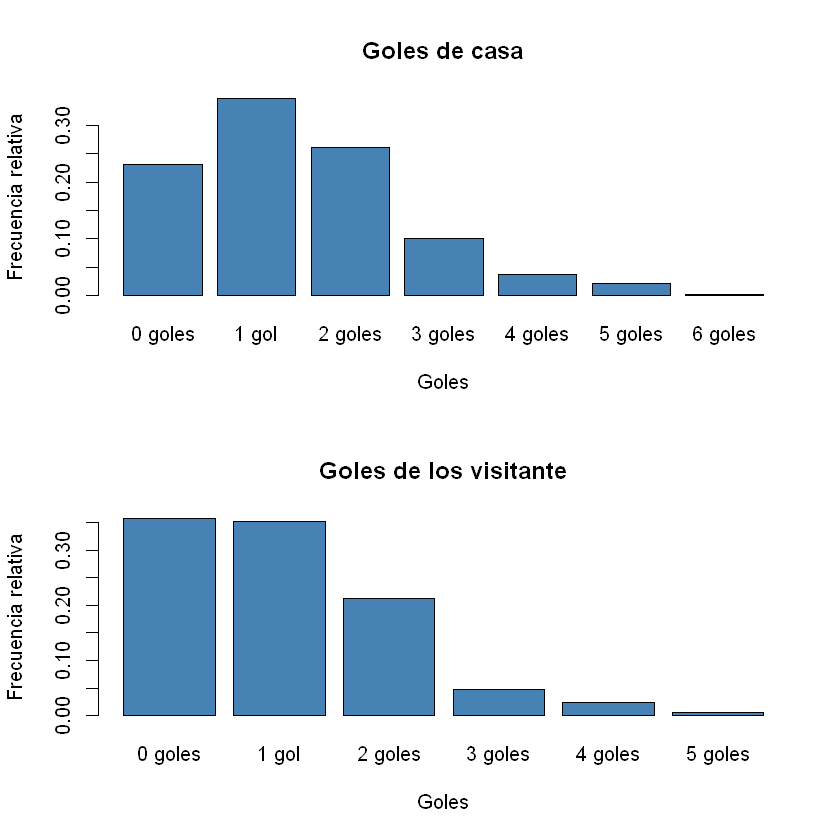

In [9]:
#Graficas de las probabilidades marginales
layout(matrix(c(1:2), nrow=2, byrow=FALSE))
barplot(ProbCasa, main = "Goles de casa",xlab="Goles",ylab="Frecuencia relativa",
        col = "steelblue")

barplot(ProbVisitante, main = "Goles de los visitante",xlab="Goles",ylab="Frecuencia relativa",
        col = "steelblue")


### Postwork 2

1. Se importa los datos de soccer de las temporadas 2017/2018, 2018/2019 y 2019/2020 de la primera división de la liga española, los datos los puedes encontrar en el siguiente enlace: https://www.football-data.co.uk/spainm.php

In [10]:
LinkT1718 <- "https://www.football-data.co.uk/mmz4281/1718/SP1.csv"
LinkT1819 <- "https://www.football-data.co.uk/mmz4281/1819/SP1.csv"
LinkT1920 <- "https://www.football-data.co.uk/mmz4281/1920/SP1.csv"

In [11]:
download.file(url = LinkT1920, destfile = "SP1.1920.csv", mode = "wb")
download.file(url = LinkT1819, destfile = "SP1.1819.csv", mode = "wb")
download.file(url = LinkT1718, destfile = "SP1.1718.csv", mode = "wb")

In [12]:
LigaEspanola <- lapply(dir()[6:8] , read.csv) 
#Si tienes más archivos en tu carpeta, tienes que colorar indices en el dir()[a:b]

2. Las estructuras de de los datas frames al usar las funciones

In [118]:
#lapply(LigaEspanola , View )
lapply(LigaEspanola , summary) 
lapply(LigaEspanola , str) 
lapply(LigaEspanola , head) 
 


[[1]]
       Date           HomeTeam         AwayTeam        FTHG      
 12/05/18:  8   Alaves    : 19   Alaves    : 19   Min.   :0.000  
 19/05/18:  6   Ath Bilbao: 19   Ath Bilbao: 19   1st Qu.:0.750  
 01/04/18:  5   Ath Madrid: 19   Ath Madrid: 19   Median :1.000  
 01/10/17:  5   Barcelona : 19   Barcelona : 19   Mean   :1.547  
 03/03/18:  5   Betis     : 19   Betis     : 19   3rd Qu.:2.000  
 05/11/17:  5   Celta     : 19   Celta     : 19   Max.   :7.000  
 (Other) :346   (Other)   :266   (Other)   :266                  
      FTAG       FTR    
 Min.   :0.000   A:115  
 1st Qu.:0.000   D: 86  
 Median :1.000   H:179  
 Mean   :1.147          
 3rd Qu.:2.000          
 Max.   :6.000          
                        

[[2]]
         Date           HomeTeam         AwayTeam        FTHG      
 12/05/2019: 10   Alaves    : 19   Alaves    : 19   Min.   :0.000  
 18/05/2019:  8   Ath Bilbao: 19   Ath Bilbao: 19   1st Qu.:1.000  
 07/04/2019:  6   Ath Madrid: 19   Ath Madrid: 19   Med

'data.frame':	380 obs. of  6 variables:
 $ Date    : Factor w/ 137 levels "01/03/18","01/04/18",..: 75 75 83 83 83 90 90 90 97 97 ...
 $ HomeTeam: Factor w/ 20 levels "Alaves","Ath Bilbao",..: 13 19 6 10 17 2 4 11 14 15 ...
 $ AwayTeam: Factor w/ 20 levels "Alaves","Ath Bilbao",..: 1 12 18 3 8 9 5 16 20 7 ...
 $ FTHG    : int  1 1 2 2 1 0 2 0 1 0 ...
 $ FTAG    : int  0 0 3 2 1 0 0 3 0 1 ...
 $ FTR     : Factor w/ 3 levels "A","D","H": 3 3 1 2 2 2 3 1 3 1 ...
'data.frame':	380 obs. of  6 variables:
 $ Date    : Factor w/ 129 levels "01/02/2019","01/03/2019",..: 68 68 74 74 74 78 78 78 82 82 ...
 $ HomeTeam: Factor w/ 20 levels "Alaves","Ath Bilbao",..: 5 10 4 6 20 7 14 19 2 17 ...
 $ AwayTeam: Factor w/ 20 levels "Alaves","Ath Bilbao",..: 13 18 1 8 16 11 9 15 12 3 ...
 $ FTHG    : int  0 0 3 1 1 1 2 1 2 1 ...
 $ FTAG    : int  3 0 0 1 2 2 0 4 1 1 ...
 $ FTR     : Factor w/ 3 levels "A","D","H": 1 2 3 2 1 1 3 1 3 2 ...
'data.frame':	380 obs. of  6 variables:
 $ Date    : Factor w/ 116 l

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
18/08/17,Leganes,Alaves,1,0,H
18/08/17,Valencia,Las Palmas,1,0,H
19/08/17,Celta,Sociedad,2,3,A
19/08/17,Girona,Ath Madrid,2,2,D
19/08/17,Sevilla,Espanol,1,1,D
20/08/17,Ath Bilbao,Getafe,0,0,D
Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
17/08/2018,Betis,Levante,0,3,A
17/08/2018,Girona,Valladolid,0,0,D
18/08/2018,Barcelona,Alaves,3,0,H


3. Selección de   las columnas Date, HomeTeam, AwayTeam, FTHG, FTAG y FTR; esto para cada uno de los data.

In [14]:
LigaEspanola <- lapply(LigaEspanola, select, Date, HomeTeam:FTR)

4. Asegúrate de que los elementos de las columnas correspondientes de los nuevos data frames sean del mismo tipo.

In [15]:
DatosLE <- do.call(rbind, LigaEspanola)
DatosLE <- mutate(DatosLE, Date = as.Date(Date, "%d/%m/%Y"))
str(DatosLE)
head(DatosLE)

'data.frame':	1140 obs. of  6 variables:
 $ Date    : Date, format: "0017-08-18" "0017-08-18" ...
 $ HomeTeam: Factor w/ 26 levels "Alaves","Ath Bilbao",..: 13 19 6 10 17 2 4 11 14 15 ...
 $ AwayTeam: Factor w/ 26 levels "Alaves","Ath Bilbao",..: 1 12 18 3 8 9 5 16 20 7 ...
 $ FTHG    : int  1 1 2 2 1 0 2 0 1 0 ...
 $ FTAG    : int  0 0 3 2 1 0 0 3 0 1 ...
 $ FTR     : Factor w/ 3 levels "A","D","H": 3 3 1 2 2 2 3 1 3 1 ...


Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0017-08-18,Leganes,Alaves,1,0,H
0017-08-18,Valencia,Las Palmas,1,0,H
0017-08-19,Celta,Sociedad,2,3,A
0017-08-19,Girona,Ath Madrid,2,2,D
0017-08-19,Sevilla,Espanol,1,1,D
0017-08-20,Ath Bilbao,Getafe,0,0,D


## Postwork 3

1. Con el último data frame obtenido en el postwork de la sesión 2, elabora tablas de frecuencias relativas para estimar las siguientes probabilidades: Probabilidad marginal equipo de casa, probabilidad marginal de equipo visitante, probabilida conjunta.

In [16]:
ProbConjuntaLE <- prop.table(table(DatosLE$FTHG,DatosLE$FTAG))
colnames(ProbConjuntaLE) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles", "6 goles")
rownames(ProbConjuntaLE) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles", "6 goles","7 goles","8 goles")

print('Probabilidad conjunta')
round(ProbConjuntaLE,5)

[1] "Probabilidad conjunta"


         
          0 goles   1 gol 2 goles 3 goles 4 goles 5 goles 6 goles
  0 goles 0.07807 0.08070 0.04561 0.01842 0.00526 0.00439 0.00000
  1 gol   0.11579 0.11491 0.06842 0.01754 0.00877 0.00175 0.00000
  2 goles 0.08772 0.09386 0.06140 0.01140 0.00877 0.00175 0.00175
  3 goles 0.04474 0.03246 0.02456 0.00614 0.00175 0.00175 0.00088
  4 goles 0.01404 0.01053 0.00702 0.00000 0.00351 0.00000 0.00000
  5 goles 0.00877 0.00526 0.00439 0.00000 0.00088 0.00000 0.00000
  6 goles 0.00263 0.00175 0.00000 0.00088 0.00000 0.00000 0.00000
  7 goles 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000 0.00000
  8 goles 0.00000 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000

In [17]:
ProbCasaLE<- prop.table(apply(ProbConjuntaLE,MARGIN = 1,sum))
ProbVisitanteLE<- prop.table( apply(ProbConjuntaLE,MARGIN = 2,sum))
ProbMarginalLE <- cbind(ProbCasaLE,c(ProbVisitanteLE, NaN,NaN))
colnames(ProbMarginalLE)[2] <- 'ProbVisitanteLE'
ProbMarginalLE

,ProbCasaLE,ProbVisitanteLE
0 goles,0.232456140,0.351754386
1 gol,0.327192982,0.340350877
2 goles,0.266666667,0.212280702
3 goles,0.112280702,0.054385965
4 goles,0.035087719,0.028947368
5 goles,0.019298246,0.009649123
6 goles,0.005263158,0.002631579
7 goles,0.000877193,NaN
8 goles,0.000877193,NaN


2. Realiza lo siguiente:

Un gráfico de barras para las probabilidades marginales estimadas del número de goles que anota el equipo de casa.

Un gráfico de barras para las probabilidades marginales estimadas del número de goles que anota el equipo visitante.

Un HeatMap para las probabilidades conjuntas estimadas de los números de goles que anotan el equipo de casa y el equipo visitante en un partido.


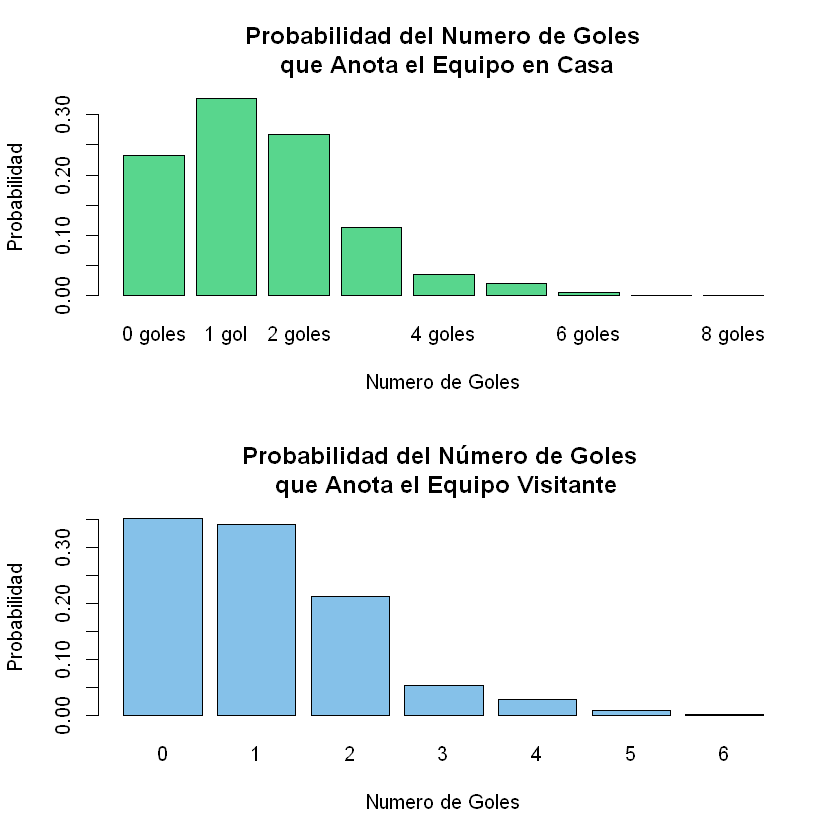

In [127]:
layout(matrix(c(1:2), nrow=2, byrow=FALSE))
barplot(ProbCasaLE, main = " Probabilidad del Numero de Goles \n que Anota el Equipo en Casa", 
     xlab = "Numero de Goles", ylab = "Probabilidad", col = "#58d68d")

barplot(prop.table(table(DatosLE$FTAG)), main = "Probabilidad del Número de Goles \n que Anota el Equipo Visitante", 
        xlab = "Numero de Goles", ylab = "Probabilidad", col = "#85c1e9")

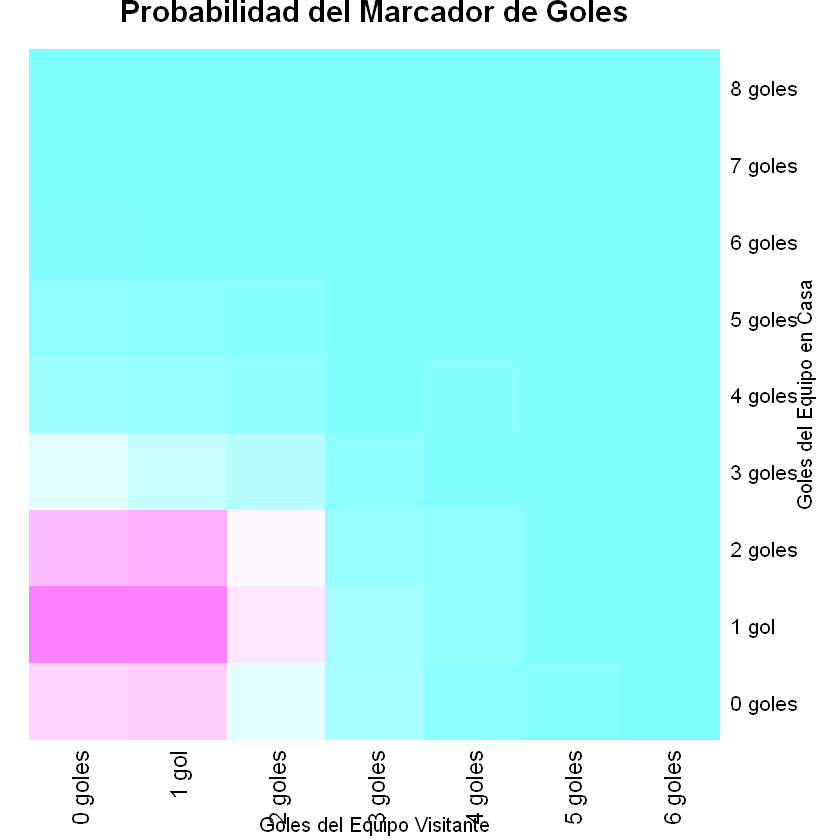

In [62]:
heatmap(ProbConjuntaLE,
        scale = "none",
        Rowv = NA, Colv = NA, 
        col = cm.colors(256),
        xlab="Goles del Equipo Visitante", ylab="Goles del Equipo en Casa",
        main = "Probabilidad del Marcador de Goles")

## Postwork 4

Investigación sobre la dependencia o independencia del número de goles anotados por el equipo de casa y el número de goles anotados por el equipo visitante mediante un procedimiento denominado bootstrap.

## Bootstrap
Una distribución de muestreo describe la probabilidad de obtener cada valor posible de un estadístico de una muestra aleatoria de una población. Bootstrap es un método que estima la distribución de muestreo al tomar múltiples muestras con reemplazo de una sola muestra aleatoria. Estas nuevas muestras se denominan muestras repetidas. Cada muestra tiene el mismo tamaño que la muestra original. 

Imita lo que pudiera ser el aspecto de la población

1. Obtén una tabla de cocientes al dividir estas probabilidades conjuntas por el producto de las probabilidades marginales correspondientes.

In [106]:
ProbCo =round(ProbConjuntaLE/t(ProbVisitanteLE %*% t(ProbCasaLE)),5)
ProbCo

         
          0 goles   1 gol 2 goles 3 goles 4 goles 5 goles 6 goles
  0 goles 0.95478 1.02004 0.92437 1.45709 0.78216 1.95540 0.00000
  1 gol   1.00606 1.03190 0.98509 0.98590 0.92615 0.55569 0.00000
  2 goles 0.93516 1.03415 1.08471 0.78629 1.13636 0.68182 2.50000
  3 goles 1.13272 0.84931 1.03048 1.00554 0.53977 1.61932 2.96875
  4 goles 1.13716 0.88144 0.94215 0.00000 3.45455 0.00000 0.00000
  5 goles 1.29222 0.80131 1.07062 0.00000 1.57025 0.00000 0.00000
  6 goles 1.42145 0.97938 0.00000 3.06452 0.00000 0.00000 0.00000
  7 goles 0.00000 2.93814 0.00000 0.00000 0.00000 0.00000 0.00000
  8 goles 0.00000 0.00000 4.71074 0.00000 0.00000 0.00000 0.00000

2.Mediante un procedimiento de boostrap, obtén más cocientes similares a los obtenidos en la tabla del punto anterior. Esto para tener una idea de las distribuciones de la cual vienen los cocientes en la tabla anterior. Menciona en cuáles casos le parece razonable suponer que los cocientes de la tabla en el punto 1, son iguales a 1 (en tal caso tendríamos independencia de las variables aleatorias X y Y).

In [56]:
set.seed(839287482)
Nmuestras = 2 # Número de muestras bootstrap
DatosLE_boot <- bootstraps(DatosLE, times = Nmuestras)

In [45]:
str(DatosLE_boot)

bootstraps [2 x 2] (S3: bootstraps/rset/tbl_df/tbl/data.frame)
 $ splits:List of 2
  ..$ :List of 4
  .. ..$ data  :'data.frame':	1140 obs. of  6 variables:
  .. .. ..$ Date    : Date[1:1140], format: "0017-08-18" ...
  .. .. ..$ HomeTeam: Factor w/ 26 levels "Alaves","Ath Bilbao",..: 13 19 6 10 17 2 4 11 14 15 ...
  .. .. ..$ AwayTeam: Factor w/ 26 levels "Alaves","Ath Bilbao",..: 1 12 18 3 8 9 5 16 20 7 ...
  .. .. ..$ FTHG    : int [1:1140] 1 1 2 2 1 0 2 0 1 0 ...
  .. .. ..$ FTAG    : int [1:1140] 0 0 3 2 1 0 0 3 0 1 ...
  .. .. ..$ FTR     : Factor w/ 3 levels "A","D","H": 3 3 1 2 2 2 3 1 3 1 ...
  .. ..$ in_id : int [1:1140] 1013 100 44 727 491 245 235 1135 1106 19 ...
  .. ..$ out_id: logi NA
  .. ..$ id    : tibble [1 x 1] (S3: tbl_df/tbl/data.frame)
  .. .. ..$ id: chr "Bootstrap1"
  .. ..- attr(*, "class")= chr [1:2] "boot_split" "rsplit"
  ..$ :List of 4
  .. ..$ data  :'data.frame':	1140 obs. of  6 variables:
  .. .. ..$ Date    : Date[1:1140], format: "0017-08-18" ...
  ..

In [57]:
Primera_boot <- DatosLE_boot$splits[[1]]
Segunda_boot <- DatosLE_boot$splits[[2]]
#Informacion de la primera muestra
Primera_boot
Segunda_boot

<Analysis/Assess/Total>
<1140/428/1140>

<Analysis/Assess/Total>
<1140/391/1140>

In [60]:
PrMuestraB = as.data.frame(Primera_boot)
SeMuestraB = as.data.frame(Segunda_boot)
head(PrMuestraB)
head(SeMuestraB)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1013,2020-02-29,Leganes,Alaves,1,1,D
100,0017-10-30,Las Palmas,La Coruna,1,3,A
44,0017-09-20,La Coruna,Alaves,1,0,H
727,2019-04-28,Valencia,Eibar,0,1,A
491,2018-11-09,Levante,Sociedad,1,3,A
245,0018-02-24,Real Madrid,Alaves,4,0,H


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
578,2019-01-20,Vallecano,Sociedad,2,2,D
489,2018-11-04,Villarreal,Levante,1,1,D
169,0017-12-23,Valencia,Villarreal,0,1,A
721,2019-04-27,Ath Bilbao,Alaves,1,1,D
824,2019-09-28,Granada,Leganes,1,0,H
32,0017-09-16,Ath Madrid,Malaga,1,0,H


In [84]:
#Se repite el proceso para obtener las probabilidades
#Se crea una función que lo haga automáticamente
ProbConjMarg <- function(x,y){
    
    ProbConjunta <- prop.table(table(x,y))
    ProbMargX<- prop.table(apply(ProbConjunta,MARGIN = 1,sum))
    ProbMargY<- prop.table(apply(ProbConjunta,MARGIN = 2,sum))
    
    heatmap(ProbConjunta ,
        scale = "none",
        Rowv = NA, Colv = NA, 
        col = cm.colors(256),
        xlab="Goles del Equipo Visitante", ylab="Goles del Equipo en Casa",
        main = "Probabilidad del Marcador de Goles")
    
    return(list(ProbConjunta,ProbMargX,ProbMargY))
}

   y
x         0       1       2       3       4       5       6
  0 0.07368 0.08333 0.05351 0.01404 0.00614 0.00439 0.00000
  1 0.12281 0.11579 0.07018 0.01579 0.01053 0.00175 0.00000
  2 0.08509 0.09649 0.05175 0.01228 0.00965 0.00088 0.00000
  3 0.03596 0.03246 0.02544 0.00614 0.00263 0.00088 0.00175
  4 0.01491 0.00877 0.00351 0.00000 0.00526 0.00000 0.00000
  5 0.01404 0.00789 0.00439 0.00000 0.00088 0.00000 0.00000
  6 0.00439 0.00175 0.00000 0.00000 0.00000 0.00000 0.00000
  7 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000 0.00000

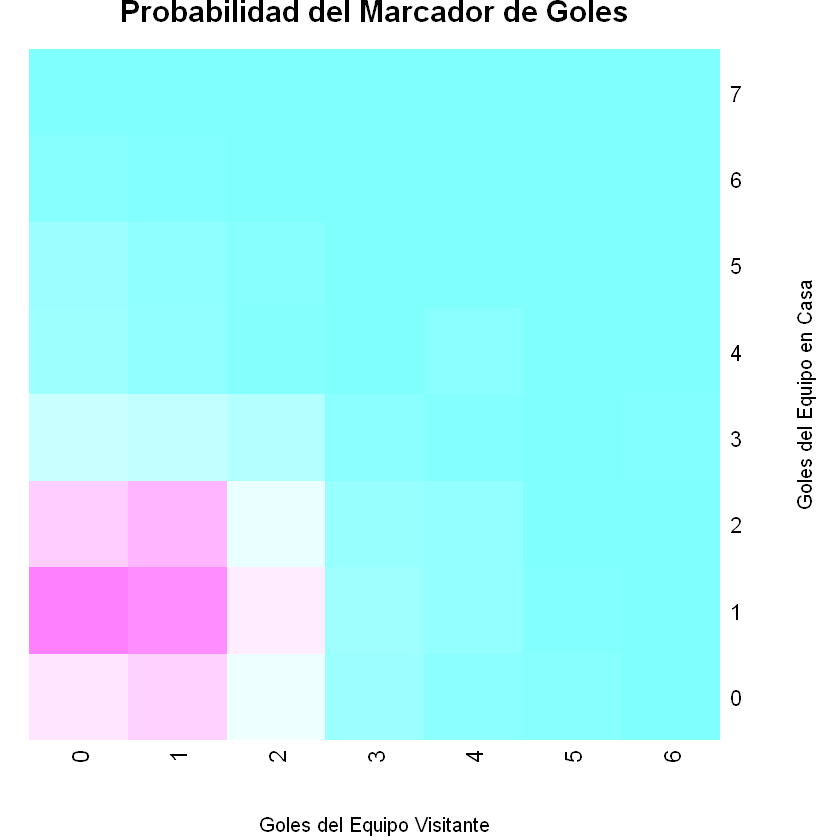

In [95]:
ProbMuestra1<-ProbConjMarg(PrMuestraB$FTHG,PrMuestraB$FTAG )
round(ProbMuestra1[[1]],5)

   y
x         0       1       2       3       4       5       6
  0 0.06930 0.09825 0.04912 0.02105 0.00789 0.00088 0.00000
  1 0.11140 0.11667 0.07193 0.01667 0.00965 0.00175 0.00000
  2 0.08421 0.09474 0.05877 0.00965 0.00877 0.00000 0.00175
  3 0.04649 0.03333 0.01754 0.00526 0.00088 0.00263 0.00000
  4 0.01228 0.01228 0.00789 0.00000 0.00351 0.00000 0.00000
  5 0.00789 0.00877 0.00175 0.00000 0.00000 0.00000 0.00000
  6 0.00000 0.00263 0.00000 0.00263 0.00000 0.00000 0.00000
  7 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000 0.00000
  8 0.00000 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000

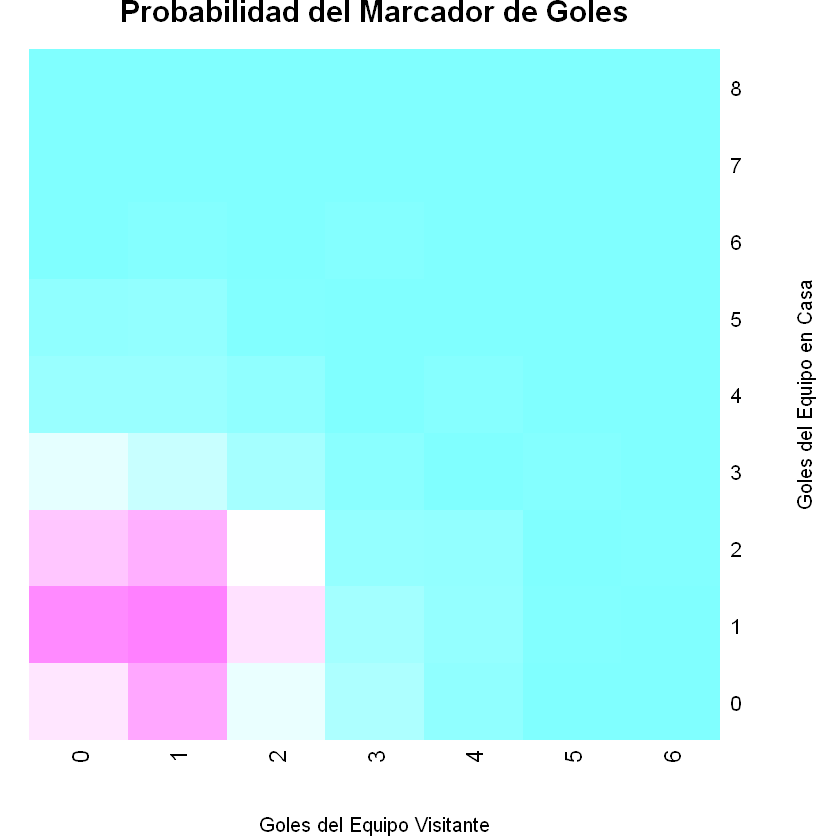

In [96]:
ProbMuestra2<-ProbConjMarg(SeMuestraB$FTHG,SeMuestraB$FTAG) 
round(ProbMuestra2[[1]],5)

## Comparación

In [123]:
print("Inicial")
ProbCo

[1] "Inicial"


         
          0 goles   1 gol 2 goles 3 goles 4 goles 5 goles 6 goles
  0 goles 0.95478 1.02004 0.92437 1.45709 0.78216 1.95540 0.00000
  1 gol   1.00606 1.03190 0.98509 0.98590 0.92615 0.55569 0.00000
  2 goles 0.93516 1.03415 1.08471 0.78629 1.13636 0.68182 2.50000
  3 goles 1.13272 0.84931 1.03048 1.00554 0.53977 1.61932 2.96875
  4 goles 1.13716 0.88144 0.94215 0.00000 3.45455 0.00000 0.00000
  5 goles 1.29222 0.80131 1.07062 0.00000 1.57025 0.00000 0.00000
  6 goles 1.42145 0.97938 0.00000 3.06452 0.00000 0.00000 0.00000
  7 goles 0.00000 2.93814 0.00000 0.00000 0.00000 0.00000 0.00000
  8 goles 0.00000 0.00000 4.71074 0.00000 0.00000 0.00000 0.00000

In [124]:
print("Primera muestra")
ProbCoM1 <- round(ProbMuestra1[[1]]/t(ProbMuestra1[[3]] %*% t(ProbMuestra1[[2]])),5)
ProbCoM1

[1] "Primera muestra"


   y
x         0       1       2       3       4       5       6
  0 0.89328 1.02047 1.09024 1.23745 0.74440 2.36318 0.00000
  1 1.03906 0.98958 0.99790 0.97159 0.89062 0.65972 0.00000
  2 0.94675 1.08447 0.96783 0.99377 1.07363 0.43379 0.00000
  3 0.97375 0.88763 1.15756 1.20909 0.71250 1.05556 9.50000
  4 1.30946 0.77805 0.51783 0.00000 4.62162 0.00000 0.00000
  5 1.47097 0.83578 0.77257 0.00000 0.91935 0.00000 0.00000
  6 2.03571 0.82251 0.00000 0.00000 0.00000 0.00000 0.00000
  7 0.00000 2.87879 0.00000 0.00000 0.00000 0.00000 0.00000

In [125]:
print("Segunda muestra")
ProbCoM2 <-round(ProbMuestra2[[1]]/t(ProbMuestra2[[3]] %*% t(ProbMuestra2[[2]])),5)
ProbCoM2

[1] "Segunda muestra"


   y
x         0       1       2       3       4       5       6
  0 0.84788 1.08443 0.95860 1.54550 1.04321 0.67616 0.00000
  1 1.02411 0.96754 1.05463 0.91928 0.95798 1.01604 0.00000
  2 0.98477 0.99946 1.09619 0.67703 1.10787 0.00000 3.87755
  3 1.32100 0.85445 0.79506 0.89728 0.26919 4.71074 0.00000
  4 1.02981 0.92904 1.05588 0.00000 3.17770 0.00000 0.00000
  5 1.29252 1.29560 0.45811 0.00000 0.00000 0.00000 0.00000
  6 0.00000 1.36038 0.00000 9.04762 0.00000 0.00000 0.00000
  7 0.00000 2.72076 0.00000 0.00000 0.00000 0.00000 0.00000
  8 0.00000 0.00000 4.81013 0.00000 0.00000 0.00000 0.00000

Como se puede observar en los heatmaps de los muestreos, la distribución es similar al de la población. Para obtener una representación aún más similar a la real, sería necesario aumentar el tamaño de muestras.

## Notas adicionales

Si no tienes instaladas las librerias usa los siguientes comandos

In [112]:
#install.packages("ggplot2")
#install.packages("dplyr")
#install.packages("rsample")